In [1]:
import pandas as pd

# 1 - Load Data

In [2]:
df = pd.read_csv("Appartements.csv")

In [3]:
df

,Titre,Prix,Ville,Type,Secteur,Etage,Age du bien,Surface habitable,NB Salons,NB Chambres,NB Salles de Bain,Frais de syndic / mois,Description
0,Appartement 165m² narjiss à El Jadida,1 160 000 DH,El Jadida,"Appartements, à vendre",Narjiss,1,NaN,229,3,6,2,NaN,un appart 115m2 et garçonnière 50m2 à vendre\n...
1,Appartement à vendre 62 m² à El Jadida,360 000 DH,El Jadida,"Appartements, à vendre",Autre secteur,2,6-10 ans,62,1,2,1,NaN,un appart 62m2 à vendre\nappart au quartier hi...
2,Appartement hay essalam 92 m² à El Jadida,750 000 DH,El Jadida,"Appartements, à vendre",Hay Essalam,2,6-10 ans,92,1,3,1,NaN,un appart 92m2 à vendre\nappart au quartier sa...
3,Appartement 110m² 2ème étg. résd. fermée Corniche,2 100 000 DH,Casablanca,"Appartements, à vendre",Bourgogne,2,1-5 ans,136,1,2,2,500.0,Appartement moderne 110m² au 2ème étg. en rési...
4,app a vendre,7 400 000 DH,El Mansouria,"Appartements, à vendre",Toute la ville,2,Neuf,60,1,1,1,450.0,vendre un belle appartement vie sur piscine et...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33316,Appartement 75m² en Vente à Larache,360 000 DH,Larache,"Appartements, à vendre",Toute la ville,1,1-5 ans,75,1,2,1,180.0,Appartement en vente\n\nPrix 36 malion
33317,Appartement en Vente à Farah Agadir,350 000 DH,Agadir,"Appartements, à vendre",Hay Al Farah,1,NaN,58,1,2,1,NaN,SERVICE CHERKI met en vente un appartement d'u...
33318,garçonnière,180 000 DH,Casablanca,"Appartements, à vendre",Ben M'sick,4,NaN,NaN,1,1,1,NaN,garçonnière au quatrième étage. tetri
33319,شقة مجهزة,125 000 DH,Agadir,"Appartements, à vendre",Hay Salam,1,6-10 ans,122,1,3,2,1.0,شقة مجهزة للبيع حي السلام بالقرب من جميع المرا...


In [4]:
df.dtypes

Titre                      object
Prix                       object
Ville                      object
Type                       object
Secteur                    object
Etage                      object
Age du bien                object
Surface habitable          object
NB Salons                  object
NB Chambres                object
NB Salles de Bain          object
Frais de syndic / mois    float64
Description                object
dtype: object

### Duplicates

In [5]:
df.duplicated().sum()

1814

In [6]:
df.drop_duplicates(inplace = True)

### Null rows

In [7]:
df.isnull().sum()

Titre                         1
Prix                          1
Ville                         4
Type                          1
Secteur                     355
Etage                       615
Age du bien                6686
Surface habitable           618
NB Salons                  1264
NB Chambres                 383
NB Salles de Bain          1237
Frais de syndic / mois    19452
Description                   3
dtype: int64

In [8]:
df.isnull().sum().sum()

30620

In [10]:
!pip install missingno

<Axes: >

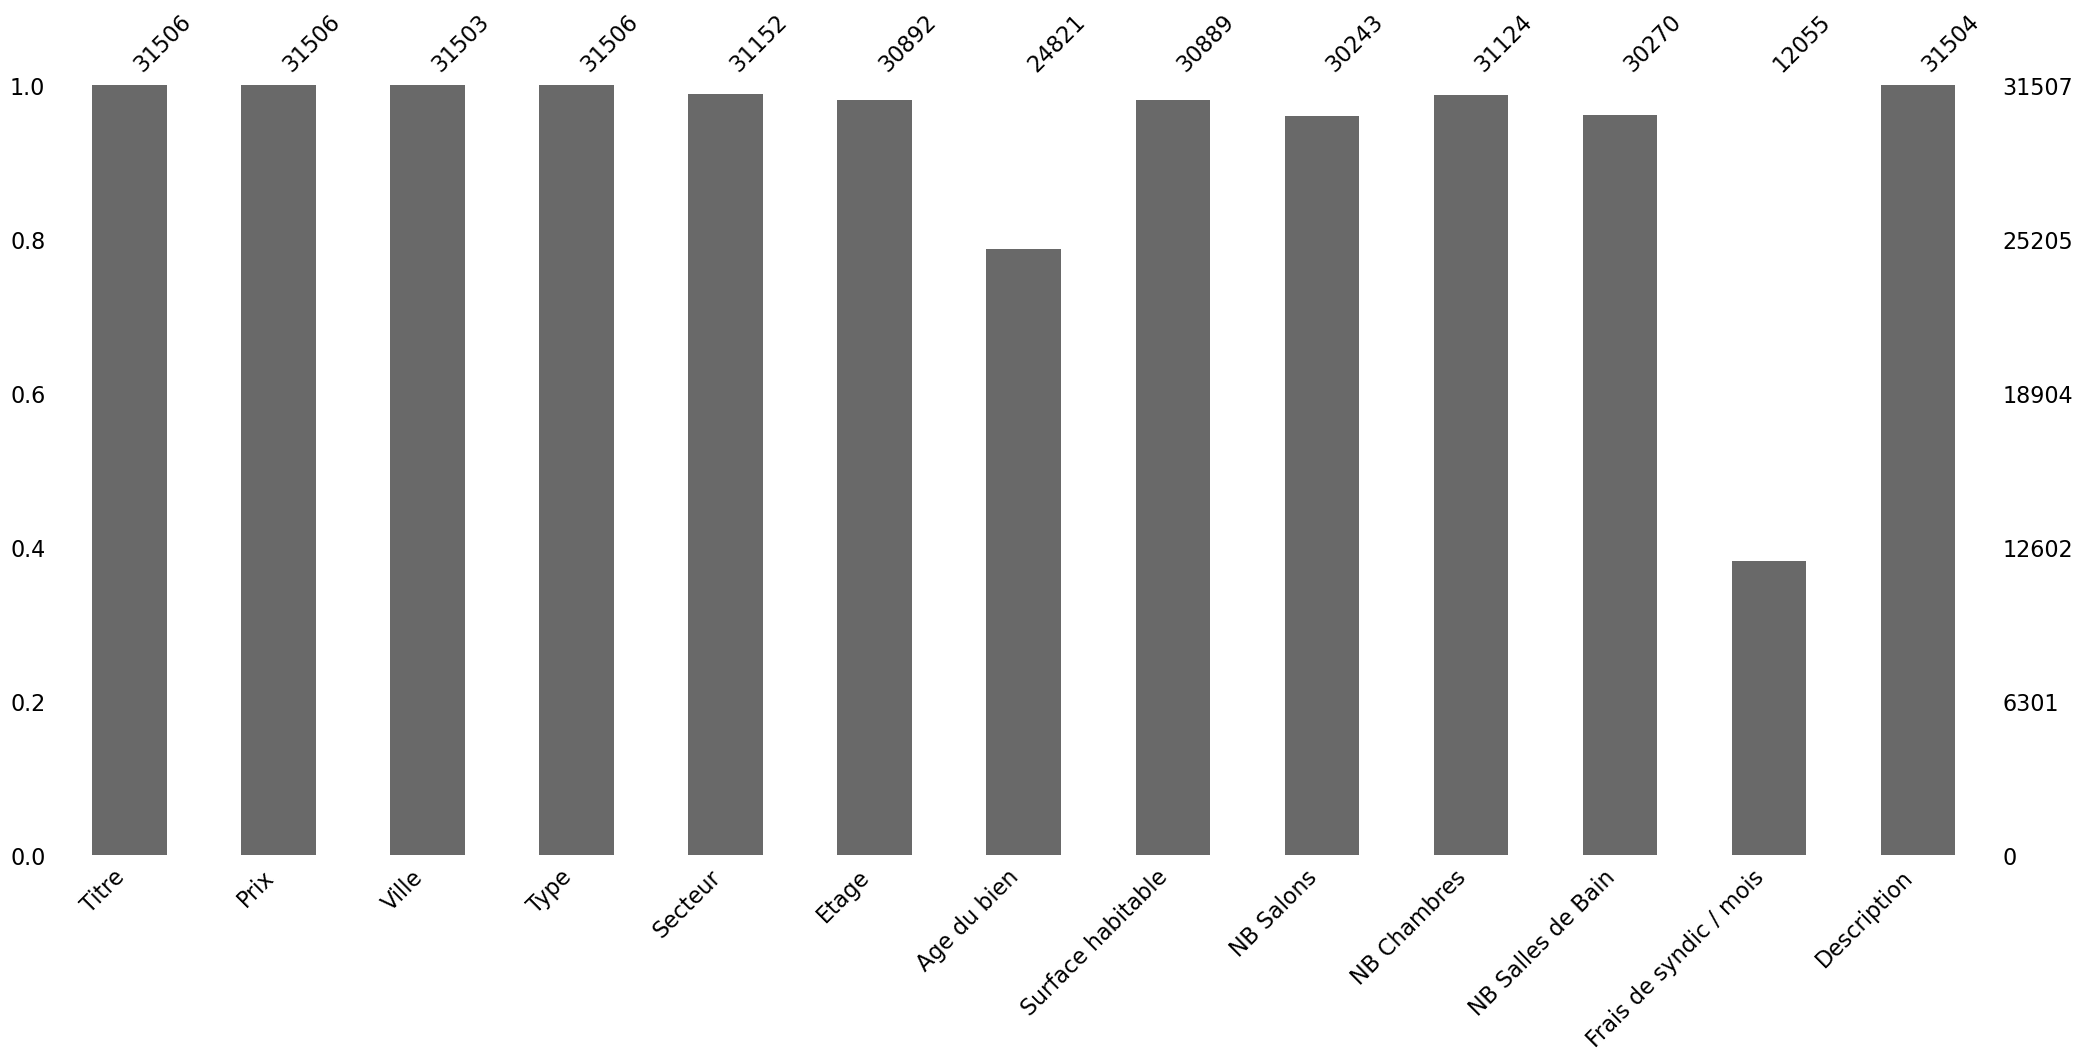

In [11]:
import missingno as msno
msno.bar(df)

### Drope ( Frais de syndic / mois  -  Age du bien  -  Type  -  Titre  -  Description) Columns

In [12]:
df = df.drop("Frais de syndic / mois", axis='columns')

In [13]:
df = df.drop("Age du bien", axis='columns')

In [14]:
df = df.drop("Type", axis='columns')

In [15]:
df = df.drop("Titre", axis='columns')

In [16]:
df = df.drop("Description", axis='columns')

### Remove rows with 'Secteur', 'Etage', 'Surface habitable', 'NB Salons', 'NB Chambres', 'NB Salles de Bain' Null

In [17]:
columns_to_check = ['Secteur', 'Etage', 'Surface habitable', 'NB Salons', 'NB Chambres', 'NB Salles de Bain']
df.dropna(subset=columns_to_check, how='all', inplace=True)

In [18]:
df

,Prix,Ville,Secteur,Etage,Surface habitable,NB Salons,NB Chambres,NB Salles de Bain
0,1 160 000 DH,El Jadida,Narjiss,1,229,3,6,2
1,360 000 DH,El Jadida,Autre secteur,2,62,1,2,1
2,750 000 DH,El Jadida,Hay Essalam,2,92,1,3,1
3,2 100 000 DH,Casablanca,Bourgogne,2,136,1,2,2
4,7 400 000 DH,El Mansouria,Toute la ville,2,60,1,1,1
...,...,...,...,...,...,...,...,...
33316,360 000 DH,Larache,Toute la ville,1,75,1,2,1
33317,350 000 DH,Agadir,Hay Al Farah,1,58,1,2,1
33318,180 000 DH,Casablanca,Ben M'sick,4,NaN,1,1,1
33319,125 000 DH,Agadir,Hay Salam,1,122,1,3,2


In [19]:
df.isnull().sum()

Prix                    0
Ville                   3
Secteur               343
Etage                 603
Surface habitable     606
NB Salons            1252
NB Chambres           371
NB Salles de Bain    1225
dtype: int64

## 1 - Prix

In [20]:
df['Prix'].isnull().sum()

0

In [21]:
len(df[df['Prix'] == 'PRIX NON SPÉCIFIÉ'])

7087

#### Drop all rows with Prix == PRIX NON SPÉCIFIÉ

In [22]:
df = df[df['Prix'] != 'PRIX NON SPÉCIFIÉ']
len(df[df['Prix'] == 'PRIX NON SPÉCIFIÉ'])

0

#### Convert Prix to int

In [23]:
df['Prix'] = df['Prix'].str.replace(' DH', '').str.replace(' ', '').str.replace(' ', '').astype(int)

C:\Users\wailb\AppData\Local\Temp\ipykernel_8524\853350707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prix'] = df['Prix'].str.replace(' DH', '').str.replace(' ', '').str.replace(' ', '').astype(int)


In [24]:
df['Prix'].max()

750000000

In [25]:
df['Prix'].min()

1

In [26]:
df['Prix'].median()

600000.0

In [27]:
df['Prix'].mean()

1128454.5510488364

In [72]:
df = df[df['Prix'] < 1800000]

In [29]:
df = df[df['Prix'] > 200000]

## 2 - Ville

In [30]:
df['Ville'].isnull().sum()

2

In [31]:
df['Ville'] = df['Ville'].astype(str)

In [32]:
df['Ville'].unique()

array(['El Jadida', 'Deroua', 'El Mansouria', 'Marrakech', 'Rabat',
       'Oujda', 'Casablanca', 'Bouskoura', 'Tanger', 'Temara', 'Agadir',
       'Sidi Rahal', 'Tamesna', 'Mohammedia', 'Sidi Kacem', 'Salé',
       'Béni Mellal', 'Kénitra', 'Mehdia', 'Nador', 'Fès', 'Martil',
       'Fnideq', 'Bouznika', 'Tétouan', 'Cabo Negro', 'Skhirat',
       'Larache', 'Dar Bouazza', 'Saidia', 'Safi', 'Ain Harrouda',
       'Benslimane', 'Sidi Bouknadel', 'Settat', 'Meknès', 'Ain Attig',
       'Tamaris', 'Khemisset', 'Drargua', 'Berrechid', 'Agadir Melloul',
       'Tifelt', 'Tit Mellil', 'Errahma', 'Ras el Ma', 'Mdiq',
       'Essaouira', 'Ain Aouda', 'Oualidia', 'Tamensourt', 'Ait Melloul',
       'Midelt', 'Oued Laou', 'Had Soualem', 'Sefrou', 'Taroudant',
       'Azemmour', 'Asilah', 'Ouled Teïma', 'Selouane', 'Mediouna',
       'Ifrane', 'Al Hoceïma', 'Sidi Bouzid', 'Taza', 'Lqliaa',
       'Sidi Slimane', 'Dcheïra El Jihadia', 'El Hajeb', 'Laâyoune',
       'Bir Jdid', 'Nouaceur', 'Azrou',

In [33]:
df['Ville'].value_counts()

Ville
Casablanca             5033
Marrakech              1501
Tanger                 1349
Kénitra                1102
Fès                    1089
                       ... 
Afourar                   1
Tahla                     1
Sidi Bibi                 1
Ifrane Atlas Saghir       1
Méchouar Fès Jdid         1
Name: count, Length: 181, dtype: int64

In [34]:
df['Ville'].fillna(df['Ville'].mode()[0])

0           El Jadida
1           El Jadida
2           El Jadida
5              Deroua
6        El Mansouria
             ...     
33312           Oujda
33313       El Jadida
33315            Salé
33316         Larache
33317          Agadir
Name: Ville, Length: 21288, dtype: object

## 3 - Secteur

In [35]:
df['Secteur'].isnull().sum()

232

In [36]:
len(df[df['Secteur'] == 'Toute la ville'])

4331

In [37]:
df.loc[df['Secteur'] == 'Toute la ville', 'Secteur'] = df['Ville']

In [38]:
df.loc[df['Secteur'] == 'Autre secteur', 'Secteur'] = df['Ville']

In [39]:
df['Secteur'].fillna(df['Ville'], inplace=True)

In [40]:
df = df.drop("Secteur", axis='columns')

## 4 - Etage

In [41]:
df.loc[df['Etage'] == 'Rez de chaussée','Etage'] = 0

In [42]:
df['Etage'] = df['Etage'].str.replace('+', '')

In [43]:
df['Etage'] = df['Etage'].fillna(df['Etage'].mode()[0]).astype(int)

In [44]:
df['Etage'] = df['Etage'].astype(int)

## 5 -  Surface habitable

In [45]:
df['Surface habitable'].isnull().sum()

246

In [46]:
import numpy as np
df['Surface habitable'] = df['Surface habitable'].replace('--', np.nan).astype(float)

In [47]:
df['Surface habitable'] = df['Surface habitable'].astype(float)

In [48]:
df['Surface habitable'] = df['Surface habitable'].fillna(df['Surface habitable'].mean())

In [49]:
df['Surface habitable'].max()

1000000.0

In [50]:
df['Surface habitable'].min()

1.0

In [51]:
df = df[df['Surface habitable'] > 30]

In [73]:
df = df[df['Surface habitable'] < 170]

## 6 - NB Salons

In [53]:
df['NB Salons'].isnull().sum()

466

In [54]:
df['NB Salons'] = df['NB Salons'].str.replace('+', '')

In [55]:
df['NB Salons'] = df['NB Salons'].fillna(df['NB Salons'].mode()[0]).astype(int)

In [56]:
df['NB Salons'] = df['NB Salons'].astype(int)

## 7 - NB Chambres

In [57]:
df['NB Chambres'].isnull().sum()

57

In [58]:
df['NB Chambres'] = df['NB Chambres'].str.replace('+', '')

In [59]:
df['NB Chambres'] = df['NB Chambres'].astype(float)

In [60]:
df['NB Chambres'] = df['NB Chambres'].fillna(df['NB Chambres'].mean()).astype(float)

## 8 - NB Salles de Bain

In [61]:
df['NB Salles de Bain'].isnull().sum()

472

In [62]:
df['NB Salles de Bain'] = df['NB Salles de Bain'].str.replace('+', '')

In [63]:
df['NB Salles de Bain'] = df['NB Salles de Bain'].fillna(df['NB Salles de Bain'].mode()[0]).astype(int)

In [64]:
df['NB Salles de Bain'] = df['NB Salles de Bain'].astype(int)

In [65]:
df

,Prix,Ville,Etage,Surface habitable,NB Salons,NB Chambres,NB Salles de Bain
1,360000,El Jadida,2,62.0,1,2.0,1
2,750000,El Jadida,2,92.0,1,3.0,1
5,250000,Deroua,4,72.0,1,3.0,1
6,445000,El Mansouria,3,50.0,1,1.0,1
7,450000,Marrakech,2,71.0,1,2.0,2
...,...,...,...,...,...,...,...
33311,1290000,Casablanca,6,130.0,2,3.0,2
33313,580000,El Jadida,1,67.0,1,2.0,1
33315,245000,Salé,3,65.0,1,2.0,1
33316,360000,Larache,1,75.0,1,2.0,1


In [66]:
df.dtypes

Prix                   int32
Ville                 object
Etage                  int32
Surface habitable    float64
NB Salons              int32
NB Chambres          float64
NB Salles de Bain      int32
dtype: object

<Axes: >

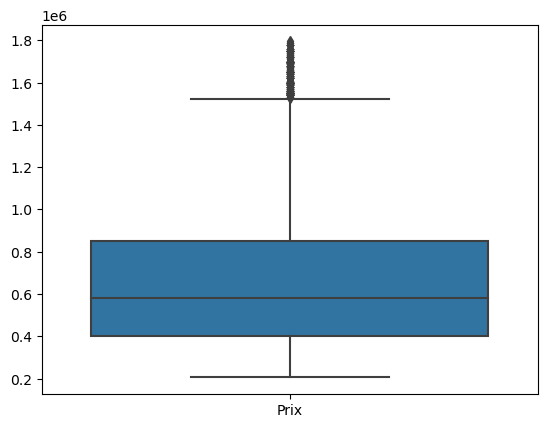

In [80]:
import seaborn as sb

sb.boxplot(data=df[['Prix']])

In [118]:
df3 = df

In [132]:
df3 = df3[~((df3['Surface habitable'] < 40) & (df3['Prix'] > 1800000))]

In [ ]:
df3 = df3[~((df3['Surface habitable'] < 60) & (df3['Prix'] > 1000000))]

In [ ]:
df3 = df3[~((df3['Surface habitable'] < 50) & (df3['Prix'] > 800000))]

In [ ]:
df3 = df3[~((df3['Surface habitable'] < 45) & (df3['Prix'] > 700000))]

In [ ]:
df3 = df3[~((df3['Surface habitable'] < 40) & (df3['Prix'] > 600000))]

In [134]:
df3 = df3[~((df3['Surface habitable'] > 100) & (df3['Prix'] < 300000))]

In [136]:
df3 = df3[~((df3['Surface habitable'] > 120) & (df3['Prix'] < 400000))]

In [138]:
df3 = df3[~((df3['Surface habitable'] > 140) & (df3['Prix'] < 600000))]

In [150]:
df = df3

<Axes: xlabel='Surface habitable', ylabel='Prix'>

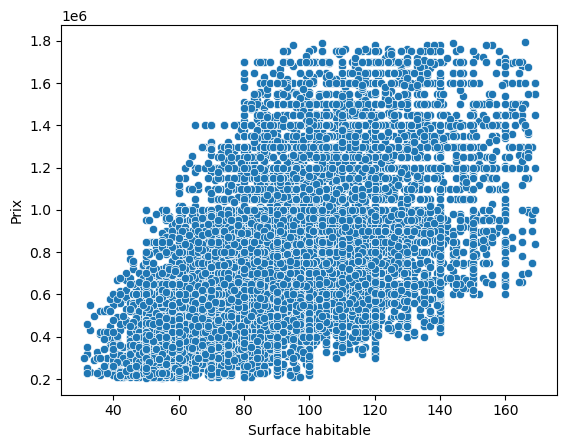

In [152]:
sb.scatterplot(data=df, x='Surface habitable', y='Prix')

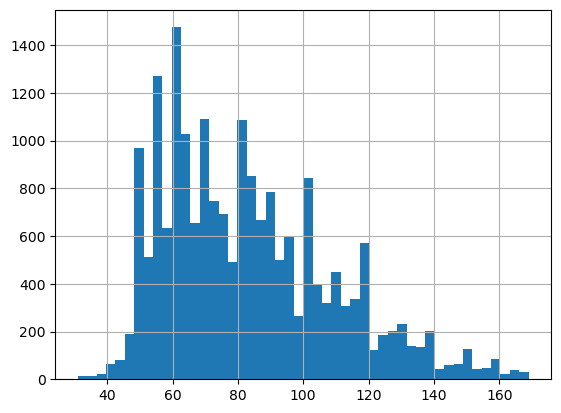

In [167]:
import matplotlib.pyplot as plt
plt.figure()
df['Surface habitable'].hist(bins='auto', alpha=1)
plt.show()

C:\Users\wailb\AppData\Local\Temp\ipykernel_8524\3259007696.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(df['Prix'], shade=True, bw_adjust=100)


<Axes: xlabel='Prix', ylabel='Density'>

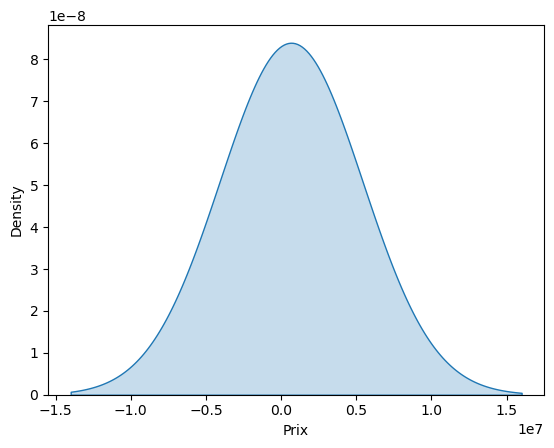

In [168]:
sb.kdeplot(df['Prix'], shade=True, bw_adjust=100)  

In [169]:
df

,Prix,Ville,Etage,Surface habitable,NB Salons,NB Chambres,NB Salles de Bain,Longitude,Latitude
1,360000,El Jadida,2,62,1,2,1,-8.500712,33.231633
2,750000,El Jadida,2,92,1,3,1,-8.500712,33.231633
5,250000,Deroua,4,72,1,3,1,-7.537081,33.416063
6,445000,El Mansouria,3,50,1,1,1,-7.291590,33.739586
7,450000,Marrakech,2,71,1,2,2,-7.989826,31.622522
...,...,...,...,...,...,...,...,...,...
33311,1290000,Casablanca,6,130,2,3,2,-7.589843,33.573110
33313,580000,El Jadida,1,67,1,2,1,-8.500712,33.231633
33315,245000,Salé,3,65,1,2,1,-6.770814,34.033697
33316,360000,Larache,1,75,1,2,1,-6.147396,35.174427


In [144]:
df.dtypes

Prix                   int32
Ville                 object
Etage                  int32
Surface habitable      int32
NB Salons              int32
NB Chambres            int32
NB Salles de Bain      int32
Longitude            float64
Latitude             float64
dtype: object

In [145]:
df['NB Chambres'] = df['NB Chambres'].astype(int)

In [146]:
df.dtypes

Prix                   int32
Ville                 object
Etage                  int32
Surface habitable      int32
NB Salons              int32
NB Chambres            int32
NB Salles de Bain      int32
Longitude            float64
Latitude             float64
dtype: object

In [147]:
df.head()

,Prix,Ville,Etage,Surface habitable,NB Salons,NB Chambres,NB Salles de Bain,Longitude,Latitude
1,360000,El Jadida,2,62,1,2,1,-8.500712,33.231633
2,750000,El Jadida,2,92,1,3,1,-8.500712,33.231633
5,250000,Deroua,4,72,1,3,1,-7.537081,33.416063
6,445000,El Mansouria,3,50,1,1,1,-7.291590,33.739586
7,450000,Marrakech,2,71,1,2,2,-7.989826,31.622522


In [148]:
df['Surface habitable'] = df['Surface habitable'].astype(int)

In [149]:
df = df[df['Surface habitable'] < 500]

# Replace Ville by Long and Lat 

In [157]:
df2 = df

In [158]:
df1 = pd.read_csv("core.csv")

In [159]:
mapping_dict = df1.set_index('Column1').to_dict(orient='index')

df2['Longitude'] = df2['Ville'].map(lambda x: mapping_dict.get(x, {'Longitude': np.nan})['Longitude'])
df2['Latitude'] = df2['Ville'].map(lambda x: mapping_dict.get(x, {'Latitude': np.nan})['Latitude'])

In [160]:
df2

,Prix,Ville,Etage,Surface habitable,NB Salons,NB Chambres,NB Salles de Bain,Longitude,Latitude
1,360000,El Jadida,2,62,1,2,1,-8.500712,33.231633
2,750000,El Jadida,2,92,1,3,1,-8.500712,33.231633
5,250000,Deroua,4,72,1,3,1,-7.537081,33.416063
6,445000,El Mansouria,3,50,1,1,1,-7.291590,33.739586
7,450000,Marrakech,2,71,1,2,2,-7.989826,31.622522
...,...,...,...,...,...,...,...,...,...
33311,1290000,Casablanca,6,130,2,3,2,-7.589843,33.573110
33313,580000,El Jadida,1,67,1,2,1,-8.500712,33.231633
33315,245000,Salé,3,65,1,2,1,-6.770814,34.033697
33316,360000,Larache,1,75,1,2,1,-6.147396,35.174427


In [161]:
df

,Prix,Ville,Etage,Surface habitable,NB Salons,NB Chambres,NB Salles de Bain,Longitude,Latitude
1,360000,El Jadida,2,62,1,2,1,-8.500712,33.231633
2,750000,El Jadida,2,92,1,3,1,-8.500712,33.231633
5,250000,Deroua,4,72,1,3,1,-7.537081,33.416063
6,445000,El Mansouria,3,50,1,1,1,-7.291590,33.739586
7,450000,Marrakech,2,71,1,2,2,-7.989826,31.622522
...,...,...,...,...,...,...,...,...,...
33311,1290000,Casablanca,6,130,2,3,2,-7.589843,33.573110
33313,580000,El Jadida,1,67,1,2,1,-8.500712,33.231633
33315,245000,Salé,3,65,1,2,1,-6.770814,34.033697
33316,360000,Larache,1,75,1,2,1,-6.147396,35.174427


In [162]:
df.isnull().sum()

Prix                 0
Ville                0
Etage                0
Surface habitable    0
NB Salons            0
NB Chambres          0
NB Salles de Bain    0
Longitude            2
Latitude             2
dtype: int64

In [163]:
df2 = df2.dropna()
df2.isnull().sum()

Prix                 0
Ville                0
Etage                0
Surface habitable    0
NB Salons            0
NB Chambres          0
NB Salles de Bain    0
Longitude            0
Latitude             0
dtype: int64

In [164]:
df2 = df2.drop('Ville', axis=1)

In [165]:
df2.dtypes

Prix                   int32
Etage                  int32
Surface habitable      int32
NB Salons              int32
NB Chambres            int32
NB Salles de Bain      int32
Longitude            float64
Latitude             float64
dtype: object

In [166]:
df2.to_csv("data.csv", index=False)